# Vortex Lattices

The ground state wavefunction of a BEC in a rotating harmonic trap contains a regular Abrikosov lattice of nodes corresponding to single quantum vortices. 

In [1]:
import sys, os
sys.path.append(os.path.abspath('..'))

import numpy as np
from condensate import Wavefunction, Environment, utils
from copy import copy, deepcopy

## Few vortices

In [6]:
steps = 2000
omega = 4
Omega = 0.5*omega*np.ones(steps)

e = Environment(DIM=256, fov=0.56e-3, N=5e5)
e.harmonic_potential(omega=omega)
e.rotating_frame(omegaR=Omega)


            Running condensate on 256x256 grid with:
            atom number: 5e+05 
            mass:        3.80e-26
        


In [7]:
wf = Wavefunction(e)
wf.initialize_Psi(width=100, vortexnumber=5)

In [8]:
wf.relax(dt=2e-3, steps=steps, vmax=3e7, save_movie='output.mp4')

In [9]:
wf.evolve(steps=0, cooling=0.01)

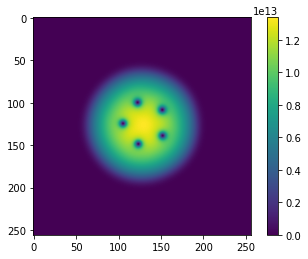

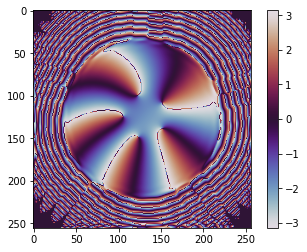

In [10]:
wf.show_density()
wf.show_phase()

## Many vortices

In [12]:
steps = 20000
omega = 4
Omega = 0.85*omega*np.ones(steps)

e = Environment(DIM=256, fov=0.76e-3, N=1.5e6)
e.harmonic_potential(omega=omega)
e.rotating_frame(omegaR=Omega)
e.spoon['type']='mouse'


            Running condensate on 256x256 grid with:
            atom number: 2e+06 
            mass:        3.80e-26
        


In [13]:
wf = Wavefunction(e)
wf.initialize_Psi(width=100, vortexnumber=10)

In [15]:
wf.relax(dt=2e-3, steps=steps, vmax=1e7, save_movie='output.mp4')

Note that setting steps=0 lets the wavefunction evolve indefinitely. Press ESC in the condensate window to return to python

In [16]:
wf.evolve(dt=1e-4, steps=0, vmax=1e7, cooling=0.001)

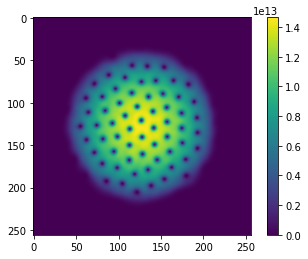

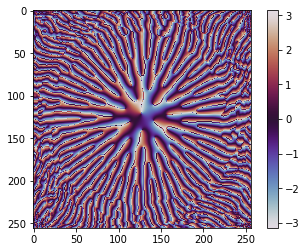

In [17]:
wf.show_density()
wf.show_phase()

# Detect Vortices

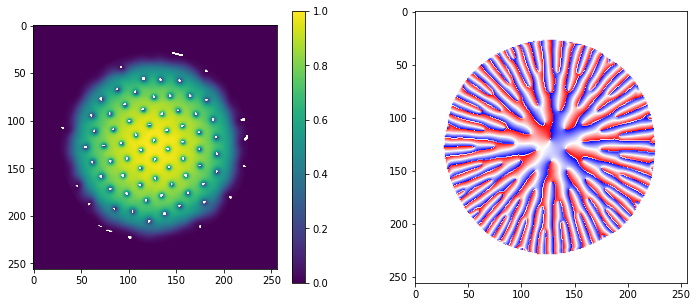

In [20]:
v = utils.phase_vortex_finder(wf.Psi,
                              blursigma=10,
                              blurthreshold=0.2,
                              debug=True)